# Práctica 1

## Integrantes

* Garcia Saavedra Armando
* Orozco Guillen Jorge David
* Rodriguez Nuñez Diego Eduardo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
import pandas as pd

## Implementación del Mergesort

In [2]:
def merge(arr_i,arr_d):
    i=j=k=0
    arreglo = np.zeros(len(arr_i)+len(arr_d))
    while i < len(arr_i) and j < len(arr_d):
        if arr_i[i] < arr_d[j]:
            arreglo[k] = arr_i[i]
            i += 1
        else:
            arreglo[k] = arr_d[j]
            j += 1
        k += 1

    while i < len(arr_i):
        arreglo[k] = arr_i[i]
        i += 1
        k += 1

    while j < len(arr_d):
        arreglo[k] = arr_d[j]
        j += 1
        k += 1
    return arreglo

def sort(arr):
    if len(arr) <= 1:
        return arr
    
    mid= len(arr) // 2
    arr_i = sort(arr[:mid])
    arr_d = sort(arr[mid:])

    return merge(arr_i,arr_d)

## Implementación del Quicksort

In [3]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivote = arr[0]
        mayor = []
        menor = []
        for i in range(1,len(arr)):
            if arr[i] < pivote:
                menor.append(arr[i])
            else:
                mayor.append(arr[i])
        return quicksort(menor)+[pivote]+quicksort(mayor)

## Comparación de tiempos

In [4]:
tams = [10,100,1000,10000,1000000,10000000,10000000,100000000]

mergesort_tiempos = []
quicksort_tiempos = []
numpysort_tiempos = []

for tam in tams:
    arr = np.random.randint(0,100000,tam)
    mergesort_tiempo = timeit.timeit('sort(arr)', number = 1, globals=globals())
    quicksort_tiempo = timeit.timeit('quicksort(arr)', number = 1, globals=globals())
    numpysort_tiempo = timeit.timeit('np.sort(arr)', number = 1, globals=globals())
    mergesort_tiempos.append(mergesort_tiempo)
    quicksort_tiempos.append(quicksort_tiempo)
    numpysort_tiempos.append(numpysort_tiempo)

In [5]:
mergesort_tiempos

[9.030004730448127e-05,
 0.0004838999593630433,
 0.005230700015090406,
 0.09893590002320707,
 10.147738800034858,
 92.78855689999182,
 82.75273220002418,
 955.8377300000284]

In [6]:
quicksort_tiempos

[2.3800006601959467e-05,
 0.0004249999765306711,
 0.002968599961604923,
 0.01500720001058653,
 4.125432999979239,
 69.04066810000222,
 68.84252100001322,
 3745.904790600005]

In [7]:
numpysort_tiempos

[5.7399971410632133e-05,
 4.269997589290142e-05,
 0.00012129999231547117,
 0.0004178999806754291,
 0.06693129998166114,
 0.5240362000185996,
 0.5680359000107273,
 5.436266699980479]

## Graficación de tiempos

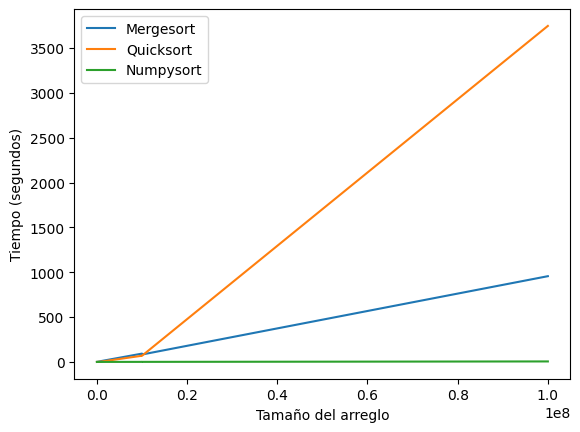

In [8]:
plt.plot(tams,mergesort_tiempos,label='Mergesort')
plt.plot(tams,quicksort_tiempos,label='Quicksort')
plt.plot(tams,numpysort_tiempos,label='Numpysort')
plt.xlabel("Tamaño del arreglo")
plt.ylabel("Tiempo (segundos)")
plt.legend()
plt.show()

## Tabulación de tiempos

In [9]:
data = {
    'Tiempos Mergesort': mergesort_tiempos,
    'Tiempos Quicksort': quicksort_tiempos,
    'Tiempos Numpysort': numpysort_tiempos,
    'Tamaños de los arreglos': tams
}

df= pd.DataFrame(data)
df.set_index('Tamaños de los arreglos',inplace=True)
df

,Tiempos Mergesort,Tiempos Quicksort,Tiempos Numpysort
Tamaños de los arreglos,,,
10,0.000090,0.000024,0.000057
100,0.000484,0.000425,0.000043
1000,0.005231,0.002969,0.000121
10000,0.098936,0.015007,0.000418
1000000,10.147739,4.125433,0.066931
10000000,92.788557,69.040668,0.524036
10000000,82.752732,68.842521,0.568036
100000000,955.837730,3745.904791,5.436267


# Conclusión

Esta primera práctica fue bastante interesante, ya que ha sido de nuestros primeros acercamientos a python, sus librerías y el uso de sus funciones. Tambien el hecho de conocer otros algoritmos e irse dando cuenta de la eficiencia qué tienen para resolver los problemas, dado que muchas veces nos vamos por la manera más intuitiva y la que parece más sencilla pero al manipular grandes cantidades de datos siempre será mejor un algoritmo más eficiente, de igual manera el implementar otros códigos ayuda a desarrollar nuestra lógica al programar, ya que en el mundo laboral nuestro trabajo necesitará de esos conocimientos y habilidades.